<a href="https://colab.research.google.com/github/AlenaMochalina/Credit-card-attrition-analysis-in-Python/blob/pr%C5%AFzkum-dat/Credit_card_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Credit card customer segmentation**



Instalace knihoven

In [473]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importy knihoven    

In [474]:
import pandas as pd
import numpy as np
# plot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator
#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#modelování
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import pickle
#vyhodnocení
from sklearn.metrics import classification_report, confusion_matrix

Načtení dat a zobrazení

In [475]:

data= pd.read_csv("BankChurners.csv")
print(data.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [476]:
data.shape
# Data set obsahuje 23 sloupečků a 10 127 řádků

(10127, 23)

In [477]:
data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [478]:
data.head()
## Tento dataset poskytuje informace o zákaznících pro předpověď odchodu zákazníků u portfolia spotřebitelských kreditních karet.

    # CLIENTNUM: Unikátní identifikátor pro každého zákazníka. (Celé číslo = Integer)
    # Attrition_Flag: Příznak označující, zda zákazník odešel. (Boolean)
    # Customer_Age: Věk zákazníka. (Celé číslo = Integer)
    # Gender: Pohlaví zákazníka. (Text = String)
    # Dependent_count: Počet závislých osob, které má zákazník. (Celé číslo = Integer)
    # Education_Level: Úroveň vzdělání zákazníka. (String)
    # Marital_Status: Rodinný stav zákazníka. (String)
    # Income_Category: Příjmová kategorie zákazníka. (String)
    # Card_Category: Typ karty, kterou zákazník vlastní. (String)
    # Months_on_book: Jak dlouho je zákazník vedený v evidenci. (Integer)
    # Total_Relationship_Count: Celkový počet vztahů, které zákazník má s poskytovatelem kreditní karty. (Integer)
    # Months_Inactive_12_mon: Počet měsíců, kdy byl zákazník neaktivní za posledních dvanáct měsíců. (Integer)
    # Contacts_Count_12_mon: Počet kontaktů, které měl zákazník za posledních dvanáct měsíců. (Integer)
    # Credit_Limit: Úvěrový limit zákazníka. (Celé číslo)
    # Total_Revolving_Bal: Celkový revolvingový zůstatek zákazníka. (Celé číslo)
    # Avg_Open_To_Buy: Průměrný poměr otevřených úvěrových možností k nákupům zákazníka. (Celé číslo)
    # Total_Amt_Chng_Q4_Q1: Celková změna částky od čtvrtého čtvrtletí do prvního čtvrtletí. (Celé číslo)
    # Total_Trans_Amt: Celková transakční částka. (Celé číslo)
    # Total_Trans_Ct: Celkový počet transakcí. (Celé číslo)
    # Total_Ct_Chng_Q4_Q1: Celková změna počtu transakcí od čtvrtého čtvrtletí do prvního čtvrtletí. (Celé číslo)
    # Avg_Utilization_Ratio: Průměrný poměr využití úvěrového limitu zákazníka. (Celé číslo)
    # Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: Naivní Bayesův klasifikátor pro předpověď odchodu zákazníka na základě charakteristik.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [479]:
data.sample(
)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
6109,779217333,Existing Customer,59,F,0,Graduate,Divorced,Less than $40K,Blue,49,...,2228.0,1502,726.0,0.719,3922,75,1.027,0.674,0.000164,0.99984


In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [481]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# dataset neobsahuje nulové hodnoty

Missing values in each column:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category  

In [482]:
print(data.duplicated().sum())

# dataset neobsahuje duplikované hodnoty

0


In [483]:
data.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [484]:
#odebrání  Naive Bayes classifier, CLIENTNUM a Attrittion_Flag
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'CLIENTNUM', 'Attrition_Flag'], axis=1)

data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [485]:
data[data== 'Unknown'].count()

Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

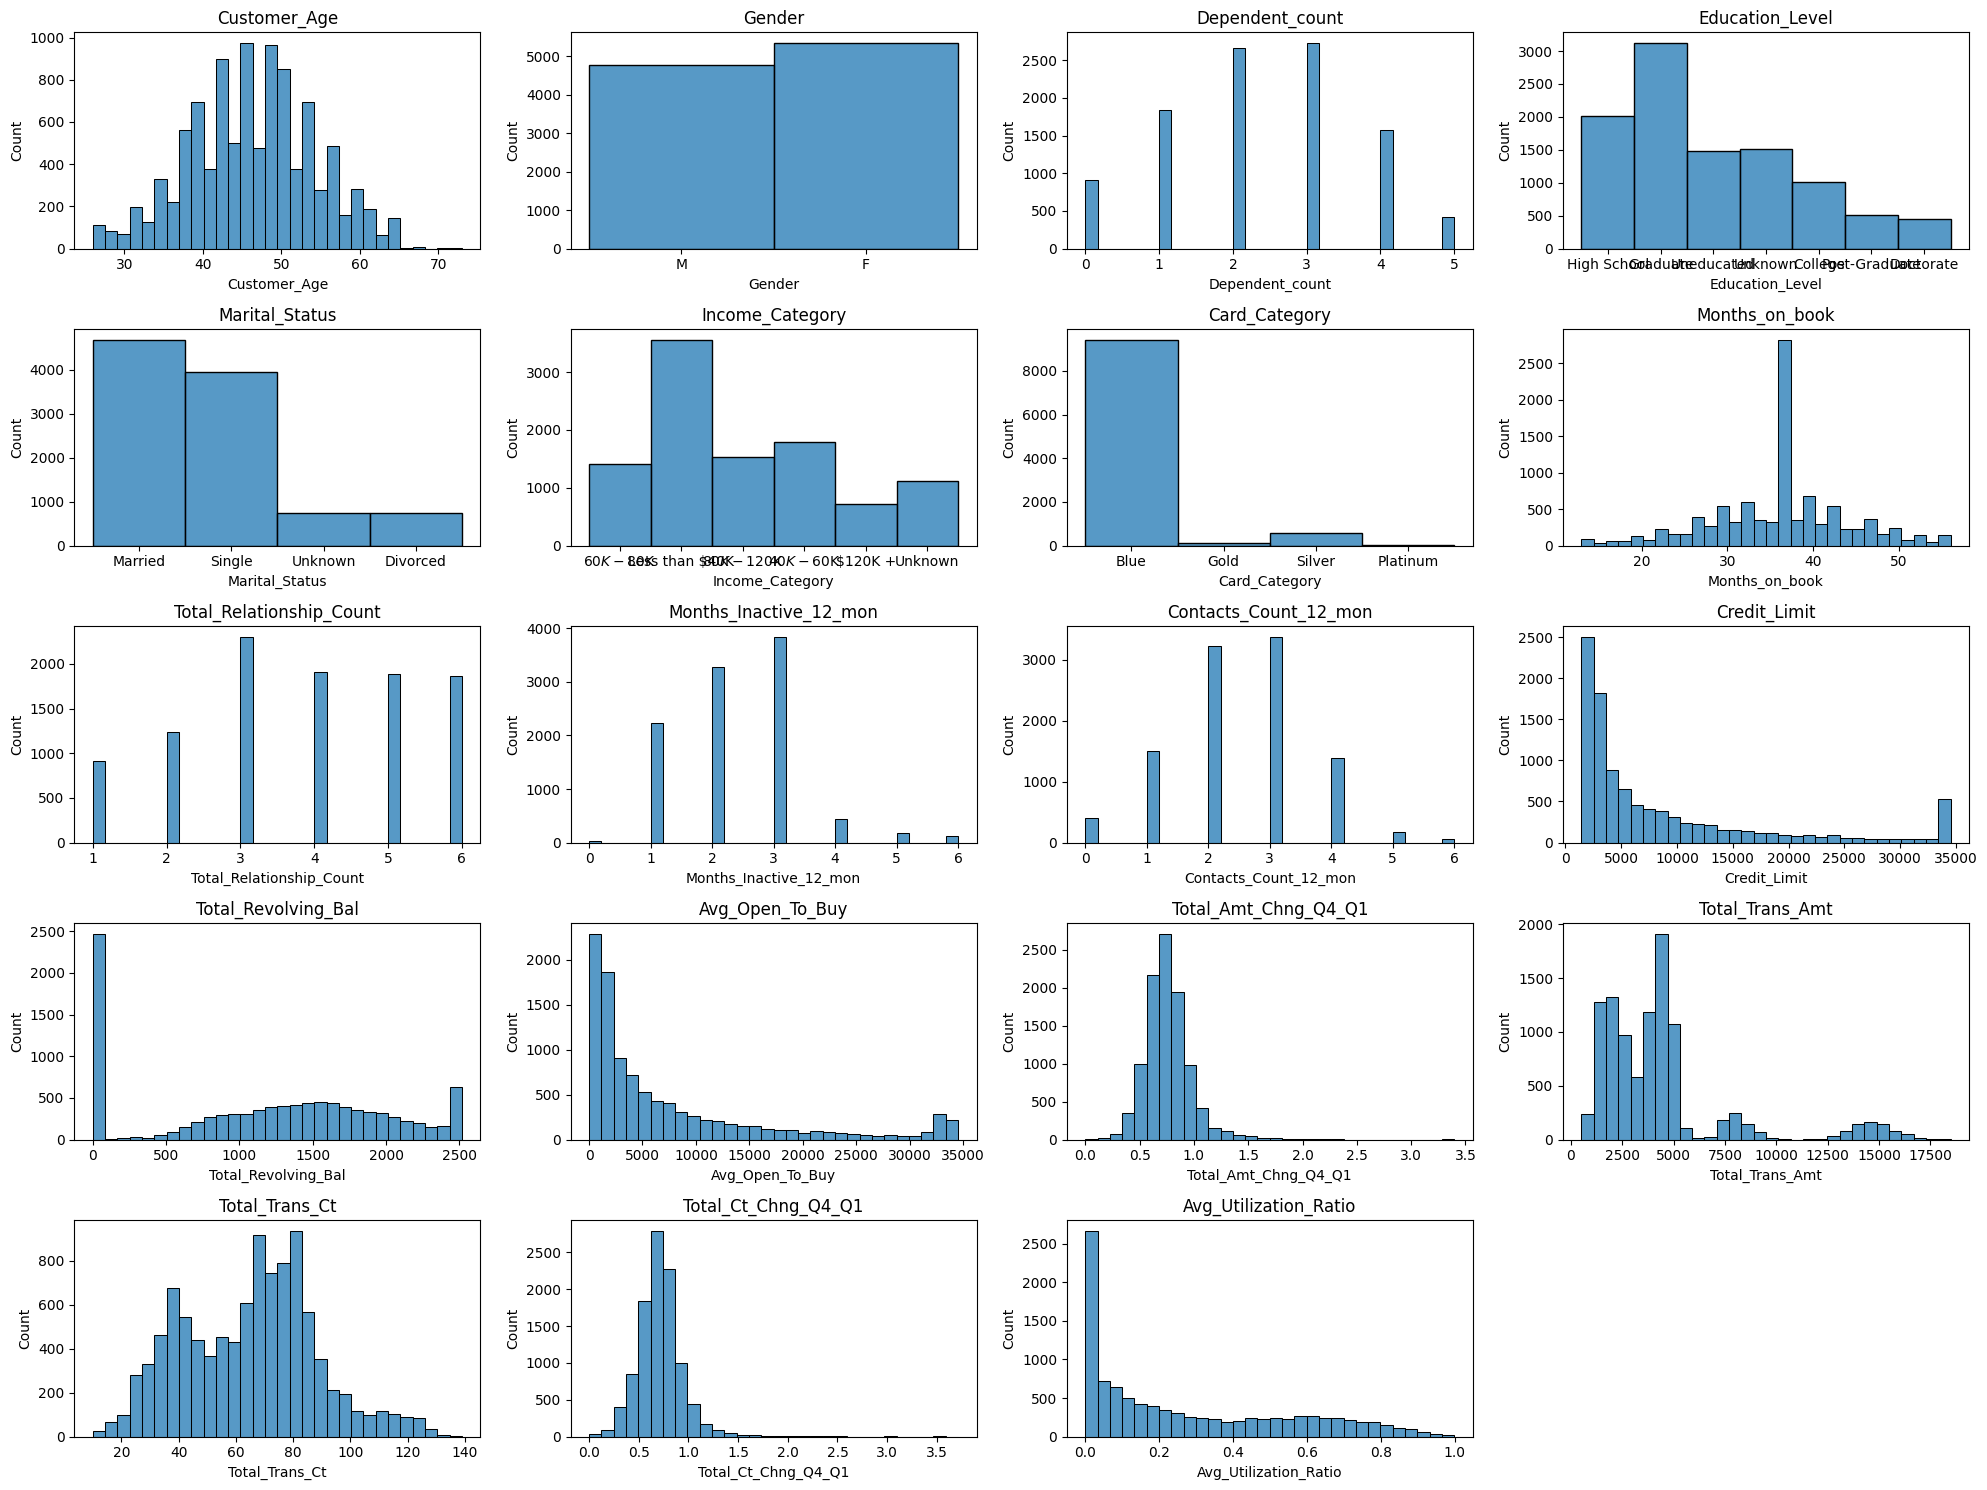

In [486]:
# zobrazení histogramu jednotlivých feature

plt.figure(figsize=(20, 15))

# Number of features
n_features = len(data.columns)

# Plot each feature as a histogram
for i, column in enumerate(data.columns, 1):
    plt.subplot((n_features // 4) + 1, 4, i)  # Adjust the grid size based on the number of features
    sns.histplot(data[column], kde=False, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

Categorical variables

In [488]:
data.groupby("Gender").size()

Gender
F    5358
M    4769
dtype: int64

In [489]:
data.groupby("Education_Level").size()

Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
dtype: int64

In [490]:
data.groupby("Marital_Status").size()

Marital_Status
Divorced     748
Married     4687
Single      3943
Unknown      749
dtype: int64

In [491]:
data.groupby("Income_Category").size()

Income_Category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
dtype: int64

In [492]:
data.groupby("Card_Category").size()

Card_Category
Blue        9436
Gold         116
Platinum      20
Silver       555
dtype: int64

In [494]:
label_gender = LabelEncoder()
label_education = LabelEncoder()
label_marital = LabelEncoder()
label_income = LabelEncoder()
label_card = LabelEncoder()

# Gender => M = 0, F = 1
data['Gender'] = label_gender.fit_transform(data['Gender'])
# Education_Level
data['Education_Level'] = label_education.fit_transform(data['Education_Level'])
# Marital_Status 
data['Marital_Status'] = label_marital.fit_transform(data['Marital_Status'])
# Income_Category 
data['Income_Category'] = label_income.fit_transform(data['Income_Category'])
# Card_Category
data['Card_Category'] = label_card.fit_transform(data['Card_Category'])

In [495]:
label_encoders = {    
    "Gender": label_gender,
    "Education_Level": label_education,
    "Marital_Status": label_marital,
    "Income_Category": label_income,
    "Card_Category": label_card
}

# Print mappings in a more readable format
for column, encoder in label_encoders.items():
    print(f"\n{column} Mapping:")
    for index, class_name in enumerate(encoder.classes_):
        print(f"  {index}: {class_name}")


Gender Mapping:
  0: F
  1: M

Education_Level Mapping:
  0: College
  1: Doctorate
  2: Graduate
  3: High School
  4: Post-Graduate
  5: Uneducated
  6: Unknown

Marital_Status Mapping:
  0: Divorced
  1: Married
  2: Single
  3: Unknown

Income_Category Mapping:
  0: $120K +
  1: $40K - $60K
  2: $60K - $80K
  3: $80K - $120K
  4: Less than $40K
  5: Unknown

Card_Category Mapping:
  0: Blue
  1: Gold
  2: Platinum
  3: Silver


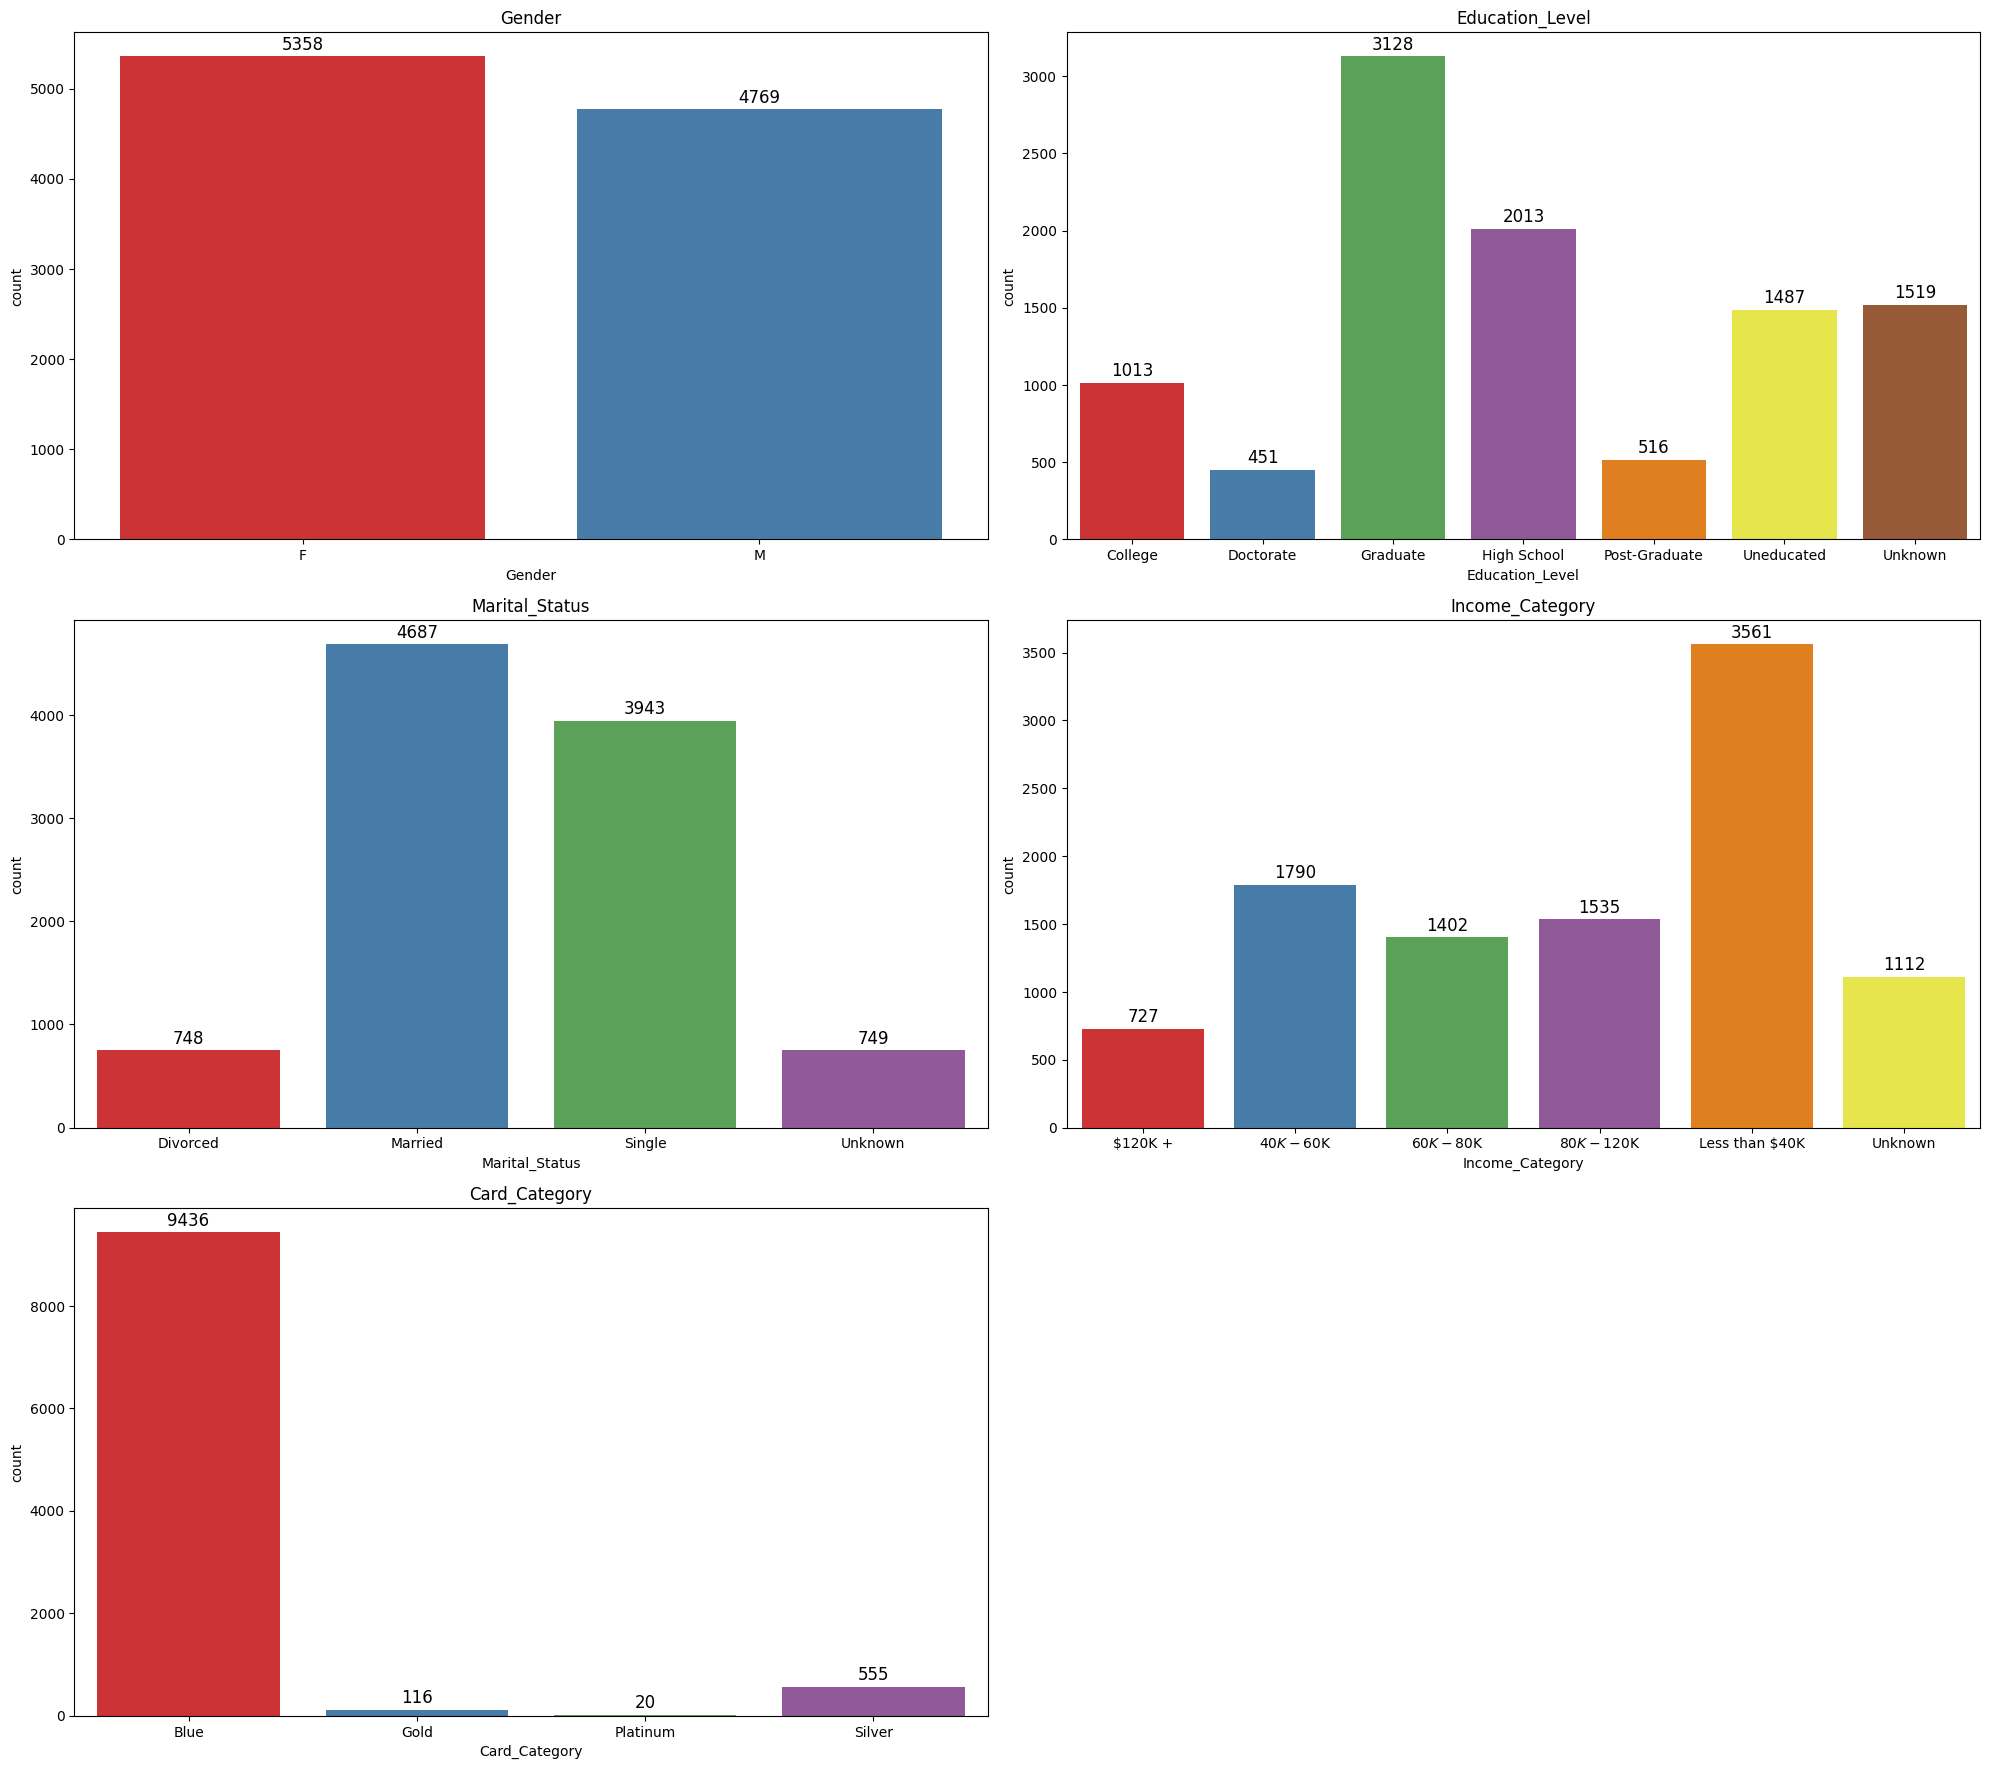

In [505]:
plt.figure(figsize=(20, 35))

# List of features to plot
features = [ "Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# Loop through each feature and create a count plot
for i, feature in enumerate(features, 1):
    plt.subplot(6, 2, i)
    plt.gca().set_title(f"{feature}")
    
    # Get the label encoding dictionary for the current feature
    if feature in label_encoders:
        label_mapping = dict(enumerate(label_encoders[feature].classes_))
        # Replace the numerical values with the label encoder classes for the x-axis ticks
        ax = sns.countplot(x=feature, hue=feature, data=data, palette='Set1', legend=False)
        
        # Get the x-tick locations and set the fixed ticks
        ax.set_xticks(range(len(label_mapping)))
        ax.xaxis.set_major_locator(FixedLocator(ax.get_xticks()))
        
        # Set tick labels using the label mapping
        ax.set_xticklabels([label_mapping.get(i) for i in range(len(label_mapping))])

    # Annotating the count on each bar with rounding to 0 decimal places
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Display the plots
plt.tight_layout()
plt.show()

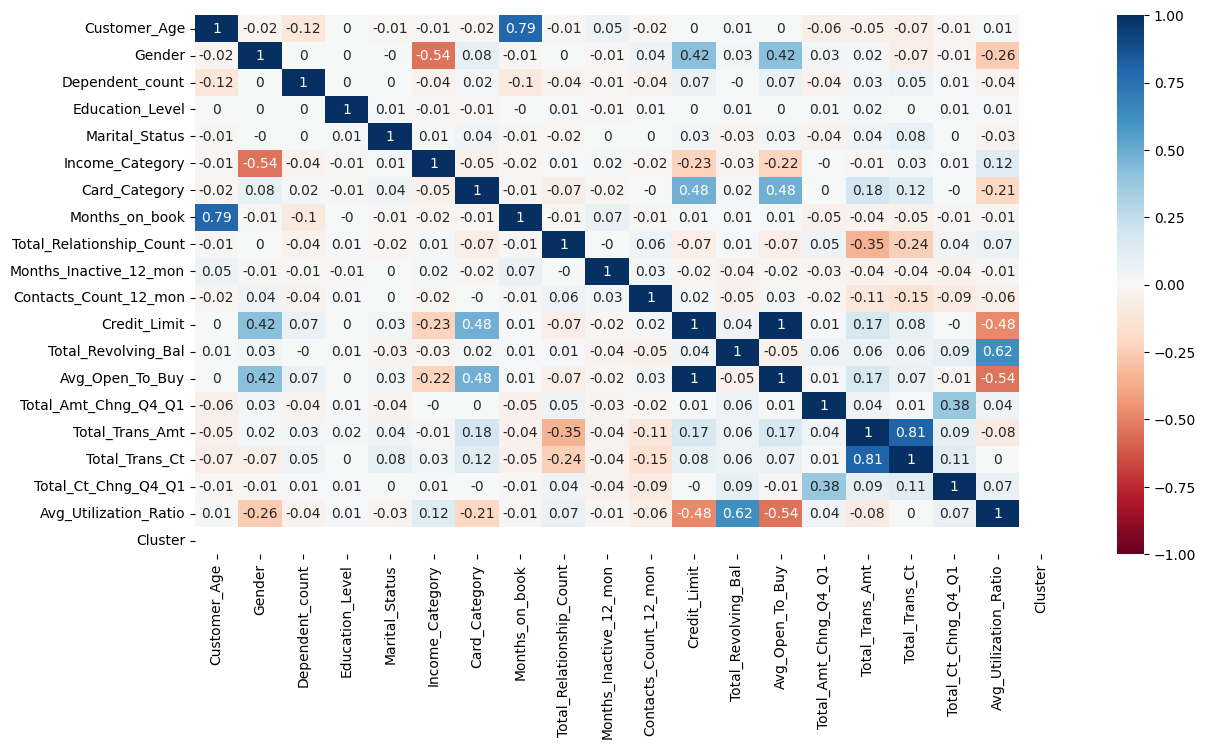

In [506]:
corr = data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(corr, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
plt.show()

In [499]:
numericals = ['Dependent_count',
            'Total_Relationship_Count',
            'Months_Inactive_12_mon',
            'Contacts_Count_12_mon',
            'Total_Trans_Ct',
            'Avg_Utilization_Ratio',
             'Income_Category']

X = data[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,Dependent_count_std,Total_Relationship_Count_std,Months_Inactive_12_mon_std,Contacts_Count_12_mon_std,Total_Trans_Ct_std,Avg_Utilization_Ratio_std,Income_Category_std
0,0.503368,0.763943,-1.327136,0.492404,-0.973895,-0.775882,-0.574182
1,2.043199,1.407306,-1.327136,-0.411616,-1.357340,-0.616276,0.755053
2,0.503368,0.120579,-1.327136,-2.219655,-1.911206,-0.997155,0.090436
3,1.273283,-0.522785,1.641478,-1.315636,-1.911206,1.759686,0.755053
4,0.503368,0.763943,-1.327136,-2.219655,-1.570365,-0.997155,-0.574182
...,...,...,...,...,...,...,...
10122,-0.266547,-0.522785,-0.337598,0.492404,2.221481,0.678714,-1.238799
10123,-0.266547,0.120579,-0.337598,0.492404,0.176440,0.856458,-1.238799
10124,-1.036462,0.763943,0.651940,1.396424,-0.207005,-0.997155,0.755053
10125,-0.266547,0.120579,0.651940,0.492404,-0.121795,-0.997155,-1.238799


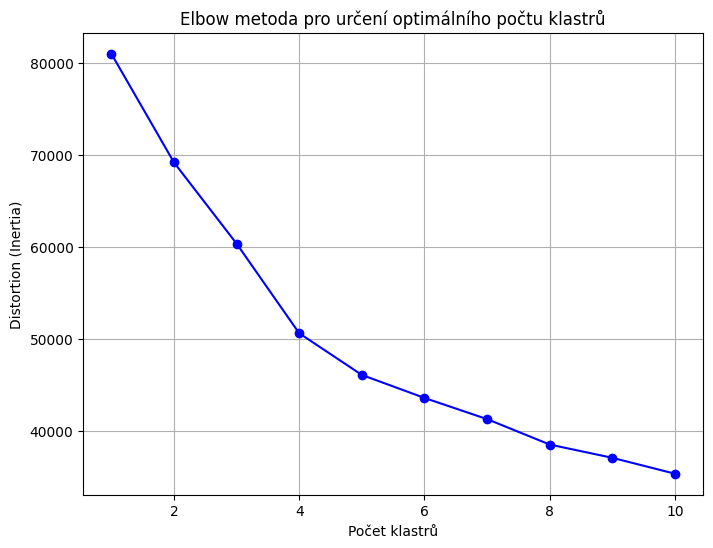

In [507]:

# Vybereme relevantní numerické vlastnosti pro segmentaci zákazníků
columns_for_clustering = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                          'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 
                          'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

# Extrahujeme vybrané sloupce
clustering_data = data[columns_for_clustering].copy()

# Předzpracování dat: Standardizace numerických dat
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Určení optimálního počtu shluků pomocí metody Elbow (loket)
distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    distortions.append(kmeans.inertia_)

# Vykreslíme graf pro výběr optimálního počtu klastrů
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Počet klastrů')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow metoda pro určení optimálního počtu klastrů')
plt.grid(True)
plt.show()

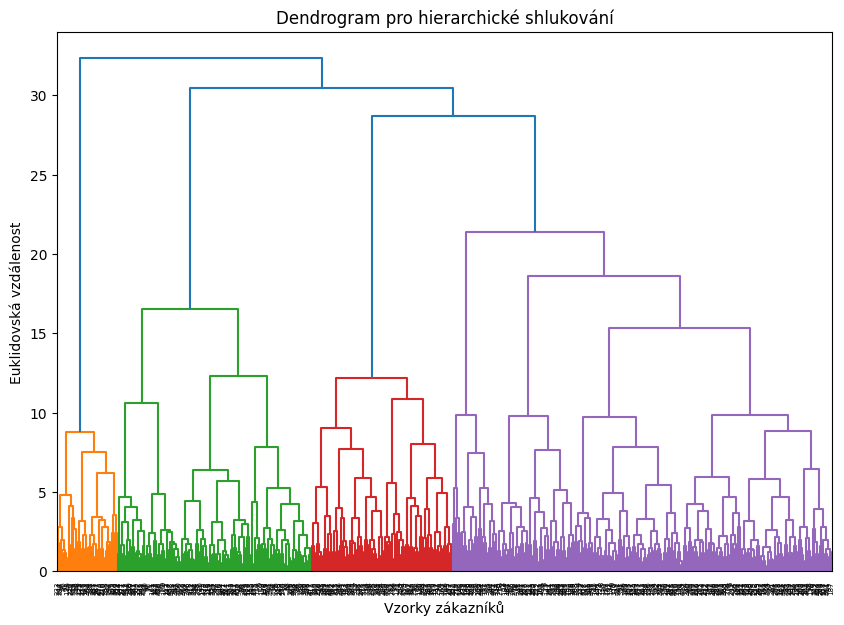

In [502]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Použijeme menší vzorek pro hierarchické shlukování
sample_data = clustering_data.sample(n=500, random_state=42)

# Standardizujeme data pro vzorek
sample_data_scaled = scaler.fit_transform(sample_data)

# Použijeme 'ward' metodu pro výpočet hierarchického shlukování
linked = linkage(sample_data_scaled, method='ward')

# Vykreslíme dendrogram pro vizualizaci hierarchie shluků
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram pro hierarchické shlukování')
plt.xlabel('Vzorky zákazníků')
plt.ylabel('Euklidovská vzdálenost')
plt.show()

In [503]:
from sklearn.cluster import DBSCAN

# Použijeme menší vzorek (např. 1000 řádků) pro DBSCAN
sample_data = data

# Standardizujeme data pro vzorek
sample_data_scaled = scaler.fit_transform(sample_data)

# Spustíme DBSCAN algoritmus
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(sample_data_scaled)

# Přidáme výsledek shlukování k datům
sample_data['Cluster'] = clusters

# Zobrazíme počet zákazníků v jednotlivých clusterech
cluster_counts = sample_data['Cluster'].value_counts()

cluster_counts

Cluster
-1    10127
Name: count, dtype: int64